In [58]:
!pip install --upgrade tensorflow-datasets



In [59]:
import tensorflow_datasets as tfds
import pandas as pd

# Load the diamonds dataset
diamonds_dataset, _ = tfds.load(name="diamonds", with_info=True)

# Access the training split
diamonds_train = diamonds_dataset["train"]

# Convert the dataset to a Pandas DataFrame
diamonds_df = tfds.as_dataframe(diamonds_train)

# Remove the "features/" prefix from column names
diamonds_df.columns = [col.replace("features/", "") for col in diamonds_df.columns]

# Define mappings for cut, color, and clarity
cut_mapping = {1: 'Fair', 2: 'Good', 3: 'Very Good', 4: 'Premium', 5: 'Ideal'}
color_mapping = {1: 'J', 2: 'I', 3: 'H', 4: 'G', 5: 'F', 6: 'E', 7: 'D'}
clarity_mapping = {1: 'I3', 2: 'I2', 3: 'I1', 4: 'SI2', 5: 'SI1', 6: 'VS2', 7: 'VS1', 8: 'VVS2', 9: 'VVS1', 10: 'IF'}

# Apply the mappings to the DataFrame
diamonds_df['cut'] = diamonds_df['cut'].map(cut_mapping)
diamonds_df['color'] = diamonds_df['color'].map(color_mapping)
diamonds_df['clarity'] = diamonds_df['clarity'].map(clarity_mapping)

# Display the first few rows of the modified DataFrame
print(diamonds_df.head())


   carat clarity color      cut      depth  table     x     y     z   price
0   1.26      I2     G     Good  60.599998   60.0  6.97  7.00  4.23  6546.0
1   0.80      I1     G  Premium  62.099998   54.0  5.96  5.99  3.71  3030.0
2   0.56     SI2     I  Premium  61.700001   54.0  5.28  5.32  3.27  1915.0
3   1.51      I1     E     Fair  64.000000   58.0  7.24  7.27  4.64  6936.0
4   0.33     VS2     F  Premium  62.200001   54.0  4.43  4.45  2.76   646.0


EXPLORATORY DATA ANALYSIS

Pair Plot:
A pair plot can show the relationships between different numerical features.

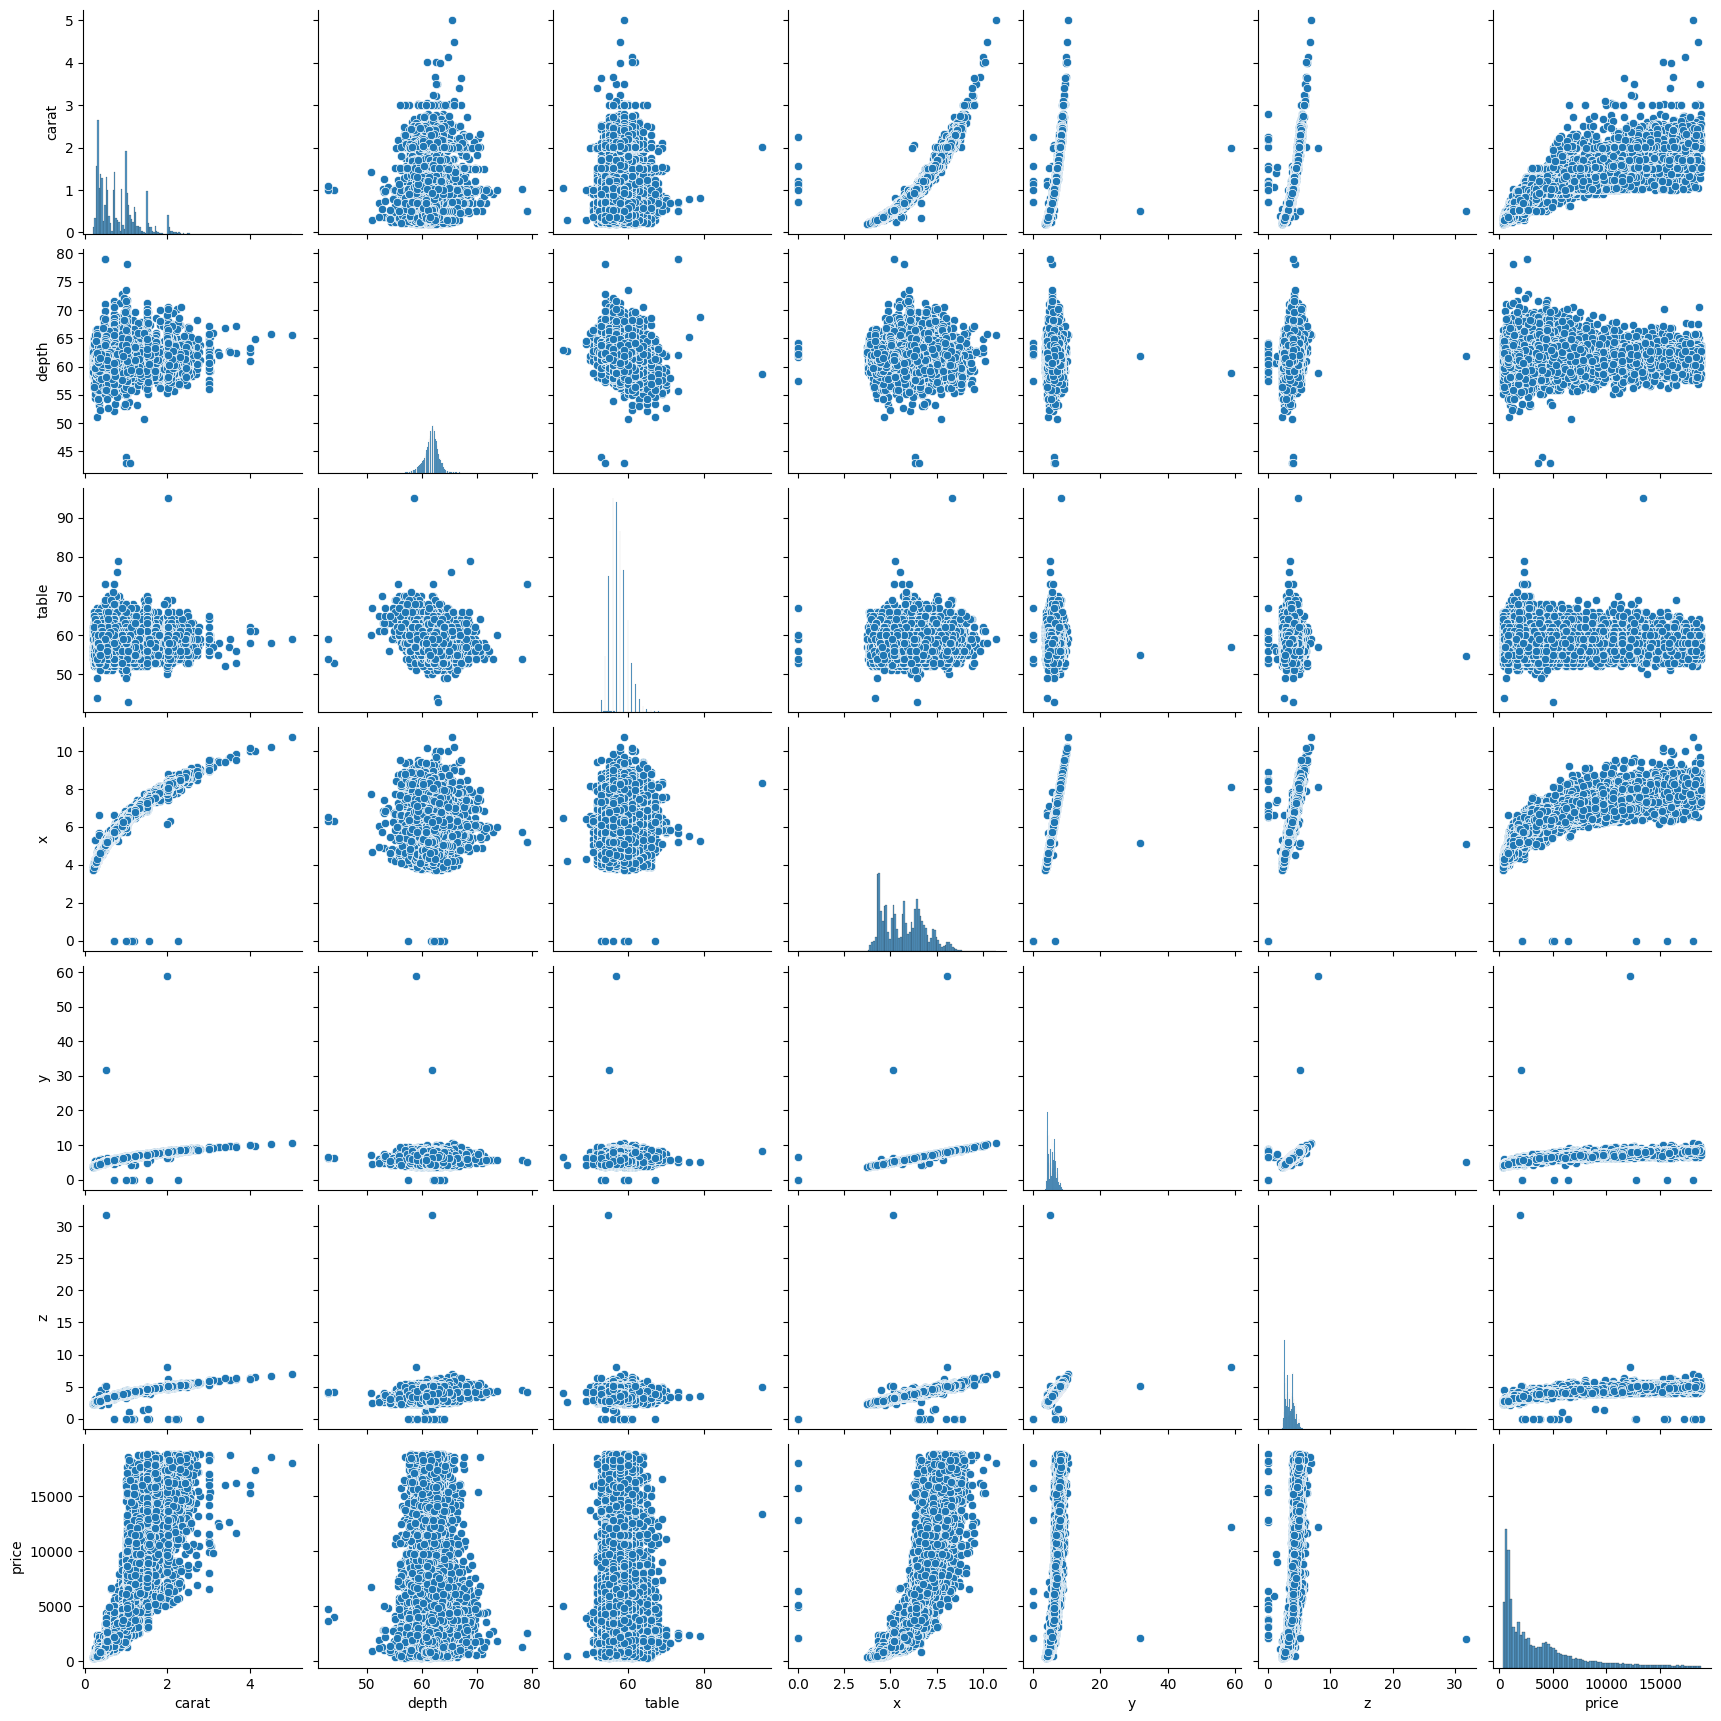

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data=diamonds_df[['carat', 'clarity', 'color', 'cut', 'depth', 'table', 'x', 'y', 'z', 'price']])
plt.show()


Correlation Heatmap:
A heatmap can visualize the correlation between numerical features, helping to identify potential relationships with the target variable.

<ipython-input-61-2f34d194ec57>:1: FutureWarning:

The default value of numeric_only in StyledDataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



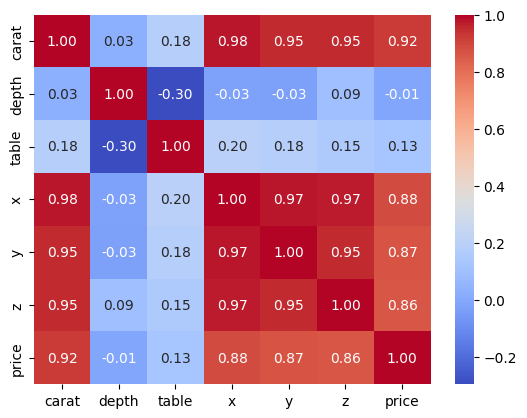

In [61]:
correlation_matrix = diamonds_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

Box Plot for Price vs. Cut:
A box plot can help visualize the distribution of prices for different cut categories.

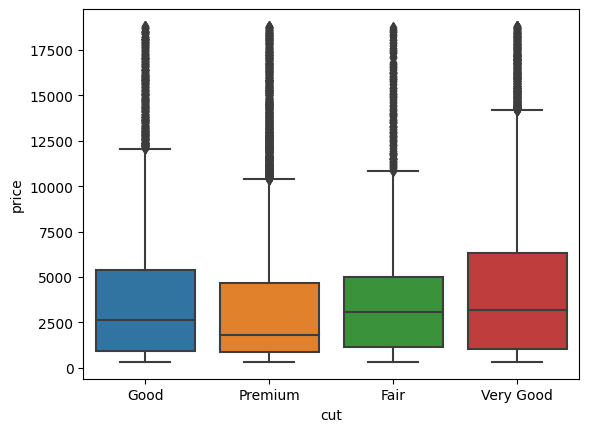

In [62]:
sns.boxplot(x='cut', y='price', data=diamonds_df)
plt.show()


Scatter Plot for Carat vs. Price:
A scatter plot can show the relationship between carat and price.

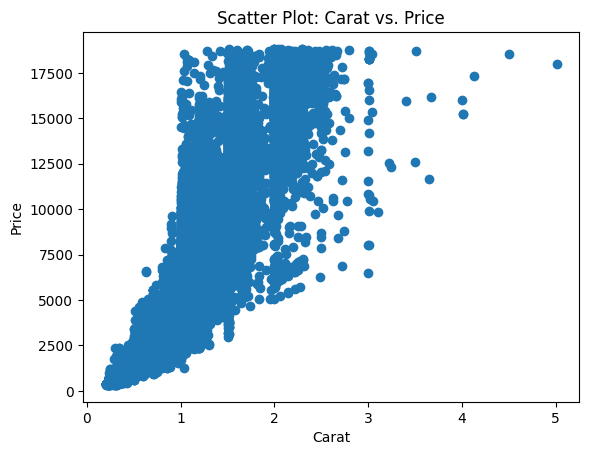

In [63]:
plt.scatter(diamonds_df['carat'], diamonds_df['price'])
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Scatter Plot: Carat vs. Price')
plt.show()


Relationship between the carat and the price of the diamond

In [64]:
import plotly.express as px
import plotly.graph_objects as go

figure = px.scatter(data_frame = diamonds_df, x="carat",
                    y="price", size="depth",
                    color= "cut", trendline="ols")
figure.show()

We can see a linear relationship between the number of carats and the price of a diamond. It means higher carats result in higher prices.

Count Plot for Color:
A count plot can display the distribution of diamonds across different color categories.

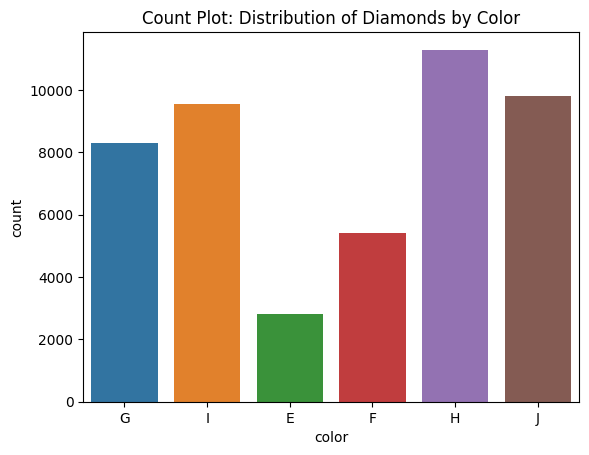

In [65]:
sns.countplot(x='color', data=diamonds_df)
plt.title('Count Plot: Distribution of Diamonds by Color')
plt.show()


Prices of all the types of diamonds based on their colour

In [66]:
fig = px.box(diamonds_df, x="cut",
             y="price",
             color="color")
fig.show()

Prices of all the types of diamonds based on their clarity

In [67]:
fig = px.box(diamonds_df,
             x="cut",
             y="price",
             color="clarity")
fig.show()